In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [2]:


#df = pd.read_csv('C:/Users/asset/Desktop/FRUAD_DETECTION/creditcard.csv', sep=',')

df = pd.read_csv('C:/../creditcard.csv', sep=',')## add the required path from your local server

In [3]:
print("Shape:")
print(df.shape)

print("First 2 lines:")
print(df.head(2))

## I dont need to show that any more
##print("describe: ")
##print(df.describe())

##print("info: ")
##print(df.info())

Shape:
(284807, 31)
First 2 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]


###  Data Preperation 

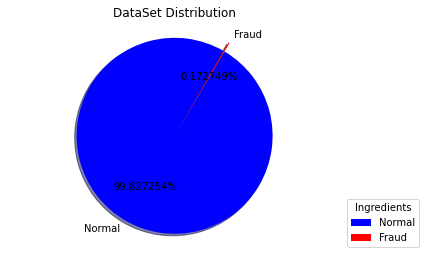

In [55]:
# Check Class variables that has 0 value for normal transactions and 1 for Fraud
fig, ax = plt.subplots(1, 1)
#print(df.Class.value_counts())
recipe = ["Normal",
          "Fraud"]

ingredients = [x.split()[-1] for x in recipe]



wedges, texts, autotexts=ax.pie(df.Class.value_counts(),autopct='%1f%%', labels=['Normal','Fraud'], colors=['Blue','r'],explode = (0, 0.1)
       ,shadow=True, startangle=60)

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0.1))
plt.axis('equal')


plt.title("DataSet Distribution", y=1.02);

Text(0, 0.5, 'Num of transactions')

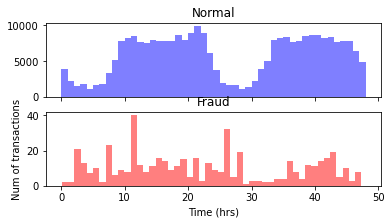

In [5]:
#check Time trend
#print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
#print(df["Time_Hr"].tail(1))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='b',alpha=0.5)
plt.title("Time Trend", y=1.02)
ax1.set_title('Normal')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('Num of transactions')

In [6]:
## Time is usless 
df = df.drop(['Time','Time_Hr'],axis=1)
print('done dropping time')

done dropping time


Text(0, 0.5, 'Transactions 2')

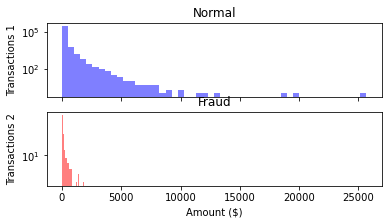

In [7]:
#check feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='b',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Normal') # to see the tails
ax3.set_ylabel('Transactions 1')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('Transactions 2')

In [8]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount','scaled_Amount'],axis=1)
print('done dropping Amount')

done dropping Amount


In [ ]:
# correlations and shapes of those 28 pca
import seaborn as sns
import matplotlib.gridspec as gridspec

In [ ]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
## we can use column from 1-2 just for easly displayin the plot
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='b')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()


In [13]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
df = df.drop(drop_list,axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


In [22]:
def split_data(df):

    # split time df into test train
    from sklearn.model_selection import train_test_split
    y = df['Class'].values # geting the array of target such as 0,1
    X = df.drop(['Class'],axis=1).values #getting the array of features values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test
print ('split done')

split done


# Data Training & Scoring (Evaluation )

In [18]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    print('0')
    # fit it to training data
    clf.fit(X_train,y_train)
    print('1')
    # predict using test data
    y_pred = clf.predict(X_test)
    print('2')
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    print('3')
    train_pred = clf.predict(X_train)
    print('4')
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [19]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [48]:
# Naive Bayes Classifier Trianing
X_train, X_test, y_train, y_test = split_data(df)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
# Naive Bayes Classifier Scoring (Evaluation )
print_scores(y_test,y_pred,y_pred_prob)

train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
0
1
2
3
4
5
train-set confusion matrix:
 [[224025   3426]
 [    60    334]]
test-set confusion matrix:
 [[55954   910]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08634538152610442
f1 score:  0.15722120658135283
accuracy score:  0.9838137705838981
ROC AUC: 0.9611556179872063


In [46]:

print(df.columns)
df_bkp= df.copy()
print(df_bkp.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


In [49]:
from sklearn import linear_model
# logistic regression Classifier Trianing
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
                                      , X_train, y_train, X_test)
# logistic regression Classifier Scoring (Evaluation )
print_scores(y_test,y_pred,y_pred_prob)

0
1
2
3
4
5
train-set confusion matrix:
 [[227423     28]
 [   167    227]]
test-set confusion matrix:
 [[56851    13]
 [   43    55]]
recall score:  0.5612244897959183
precision score:  0.8088235294117647
f1 score:  0.6626506024096385
accuracy score:  0.9990168884519505
ROC AUC: 0.9747862425780667


### undersampling 

In [52]:
# TEST
#np.array(df[df.Class == 1].index)
#df[df.Class == 0].index
len(df[df.Class == 1])

492

In [53]:
##### UNDER SAMPLING considering 50/50 ratio of both classes #######
# indices for fraud and normal classes 
ind_normal = df[df.Class == 0].index
ind_fraud = np.array(df[df.Class == 1].index)
n_fraud = len(df[df.Class == 1])
# random selection from normal class
random_normal_ind = np.random.choice(ind_normal, n_fraud, replace = False)
random_normal_ind = np.array(random_normal_ind)
# merge two class indices: random normal + original fraud
under_sample_ind = np.concatenate([ind_fraud,random_normal_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['Class'].values #target
X_undersample = undersample_df.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_df))
print("% normal transactions: ",len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  984
% normal transactions:  0.5
% fraud transactions:  0.5


### after undersampling 

In [59]:
## predictions for test-dataset (20% of full dataset) after undersampling 
lr = LogisticRegression(C = 0.01, penalty='l1', solver='liblinear')
lr.fit(X_undersample, y_undersample)
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
## scoreing for test-dataset (20% of full dataset)
print("scores for test (20% of full) set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))
print("f1 score: ", f1_score(y_test,y_p20_pred))
print("accuracy score: ", accuracy_score(y_test,y_p20_pred))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_p20_pred)))

scores for test (20% of full) set
test-set confusion matrix:
 [[54718  2146]
 [    8    90]]
recall score:  0.9183673469387755
precision score:  0.04025044722719141
f1 score:  0.07712082262210797
accuracy score:  0.9621853165268074
ROC AUC: 0.9403140899015768
